In [12]:
# loading the necessary libraries
import pandas as pd
import numpy as np
import io, requests
import matplotlib.pyplot as plt

In [13]:
# Initializing and connecting to our database
%load_ext sql

#Establishing a connection to the memory sqlite database
%sql sqlite://

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


'Connected: @None'

In [14]:
# loading the dataset and creating a dataframe
url = "http://bit.ly/autolib_dataset"


# with open(url,'r') as f:
autolib = pd.read_csv(url, index_col=0, encoding='utf-8')

In [15]:
# Step 1:
# Getting more info on the data
autolib.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 2 Avenue de Suffren to 5 Rue Henry Brisson
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Cars                 5000 non-null   int64 
 1   Bluecar counter      5000 non-null   int64 
 2   Utilib counter       5000 non-null   int64 
 3   Utilib 1.4 counter   5000 non-null   int64 
 4   Charge Slots         5000 non-null   int64 
 5   Charging Status      5000 non-null   object
 6   City                 5000 non-null   object
 7   Displayed comment    111 non-null    object
 8   ID                   5000 non-null   object
 9   Kind                 5000 non-null   object
 10  Geo point            5000 non-null   object
 11  Postal code          5000 non-null   int64 
 12  Public name          5000 non-null   object
 13  Rental status        5000 non-null   object
 14  Scheduled at         47 non-null     object
 15  Slots                5000 n

In [16]:
# checking columns and their data types
autolib.dtypes

Cars                    int64
Bluecar counter         int64
Utilib counter          int64
Utilib 1.4 counter      int64
Charge Slots            int64
Charging Status        object
City                   object
Displayed comment      object
ID                     object
Kind                   object
Geo point              object
Postal code             int64
Public name            object
Rental status          object
Scheduled at           object
Slots                   int64
Station type           object
Status                 object
Subscription status    object
year                    int64
month                   int64
day                     int64
hour                    int64
minute                  int64
dtype: object

In [17]:
# getting a short dexcriptive analysis of the dataset
autolib.describe()

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,hour,minute
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.000000,5000.000000,5000.000000
mean,2.333600,2.333600,0.059600,0.123000,0.253400,82634.878400,1.932400,2018.0,4.0,4.941600,11.509200,29.270000
std,2.035274,2.035274,0.246698,0.356506,0.546304,8835.865721,1.905402,0.0,0.0,2.597063,6.893549,17.231741
min,0.000000,0.000000,0.000000,0.000000,0.000000,75001.000000,0.000000,2018.0,4.0,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,75012.000000,0.000000,2018.0,4.0,3.000000,6.000000,14.000000
50%,2.000000,2.000000,0.000000,0.000000,0.000000,75019.000000,1.000000,2018.0,4.0,5.000000,11.000000,29.000000
75%,4.000000,4.000000,0.000000,0.000000,0.000000,92320.000000,3.000000,2018.0,4.0,7.000000,18.000000,44.000000
max,7.000000,7.000000,2.000000,3.000000,2.000000,95880.000000,7.000000,2018.0,4.0,9.000000,23.000000,59.000000


In [18]:
# Printing sample values of the dataset
autolib.head(10)

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
Address,,,,,,,,,,,,,,,,,,,,,,,,
2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,NaN,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,NaN,4,station,ok,nonexistent,2018,4,6,7,2
37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,"Station en parking (niv -1), accÃ¨s 37 rue Leb...",paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,NaN,0,station,closed,nonexistent,2018,4,8,18,20
17 Rue des Luaps ProlongÃ©e,3,3,1,0,0,nonexistent,Nanterre,NaN,nanterre-luaps-17,STATION,"48.88069, 2.21063",92000,Nanterre/Luaps/17,operational,NaN,0,station,ok,nonexistent,2018,4,4,22,13
34 avenue Jean Moulin,1,1,0,0,0,nonexistent,Paris,NaN,paris-jeanmoulin-34,STATION,"48.8266807, 2.3237355",75014,Paris/Jean Moulin/34,operational,NaN,4,station,ok,nonexistent,2018,4,2,22,58


In [19]:
# Step 2
# Checking and cleaning the data
# looking for and removing null values
autolib.isnull()

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
Address,,,,,,,,,,,,,,,,,,,,,,,,
2 Avenue de Suffren,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
145 Rue Raymond Losserand,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2 Avenue John Fitzgerald Kennedy,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
51 Rue EugÃ¨ne OudinÃ©,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
6 avenue de la Porte de Champerret,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8 avenue MÃ©nelotte,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
37 rue de Dantzig,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
142 rue du Bac,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [20]:
# Removing null values present at 'Scheduled at' and 'Displayed comment' columns
autolib.dropna()

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
Address,,,,,,,,,,,,,,,,,,,,,,,,


In [21]:
# checking columns present
autolib.columns

Index(['Cars', 'Bluecar counter', 'Utilib counter', 'Utilib 1.4 counter',
       'Charge Slots', 'Charging Status', 'City', 'Displayed comment', 'ID',
       'Kind', 'Geo point', 'Postal code', 'Public name', 'Rental status',
       'Scheduled at', 'Slots', 'Station type', 'Status',
       'Subscription status', 'year', 'month', 'day', 'hour', 'minute'],
      dtype='object')

In [22]:
# checking for duplicate values
autolib.duplicated().sum()
# zero duplicated values obtained

0

In [23]:
# Data analysis
# Filtering the data
autolib_new = autolib.filter(['Bluecar counter', 'Slots', 'hour'], axis=1)

In [24]:
# Getting the peak hour 
print(autolib['hour'].value_counts())

21    237
9     221
16    220
6     219
7     219
2     218
3     218
13    213
5     211
8     211
11    210
18    210
19    208
14    207
20    202
23    201
12    200
15    200
4     199
17    198
22    196
1     194
10    194
0     194
Name: hour, dtype: int64


In [25]:
# Finding out how much the bluecar was used
autolib_new['use_bluecar'] = autolib_new['Bluecar counter'].diff()

In [26]:
autolib_new.head(10)

,Bluecar counter,Slots,hour,use_bluecar
Address,,,,
2 Avenue de Suffren,0,2,11,NaN
145 Rue Raymond Losserand,6,0,7,6.0
2 Avenue John Fitzgerald Kennedy,3,1,20,-3.0
51 Rue EugÃ¨ne OudinÃ©,3,2,4,0.0
6 avenue de la Porte de Champerret,3,3,17,0.0
8 Boulevard Voltaire,0,4,7,-3.0
37 rue Leblanc,0,0,18,0.0
17 Rue des Luaps ProlongÃ©e,3,0,22,3.0
34 avenue Jean Moulin,1,4,22,-2.0


In [27]:
autolib['use_utilib'] = autolib['Utilib counter'].diff()

In [28]:
# Finding out if the use of utilib has any effect
print(autolib_new['use_bluecar'].value_counts())

 0.0    840
-1.0    579
 1.0    562
-2.0    496
 2.0    472
-3.0    405
 3.0    396
 4.0    308
-4.0    294
-5.0    226
 5.0    212
 6.0     99
-6.0     90
 7.0     14
-7.0      6
Name: use_bluecar, dtype: int64


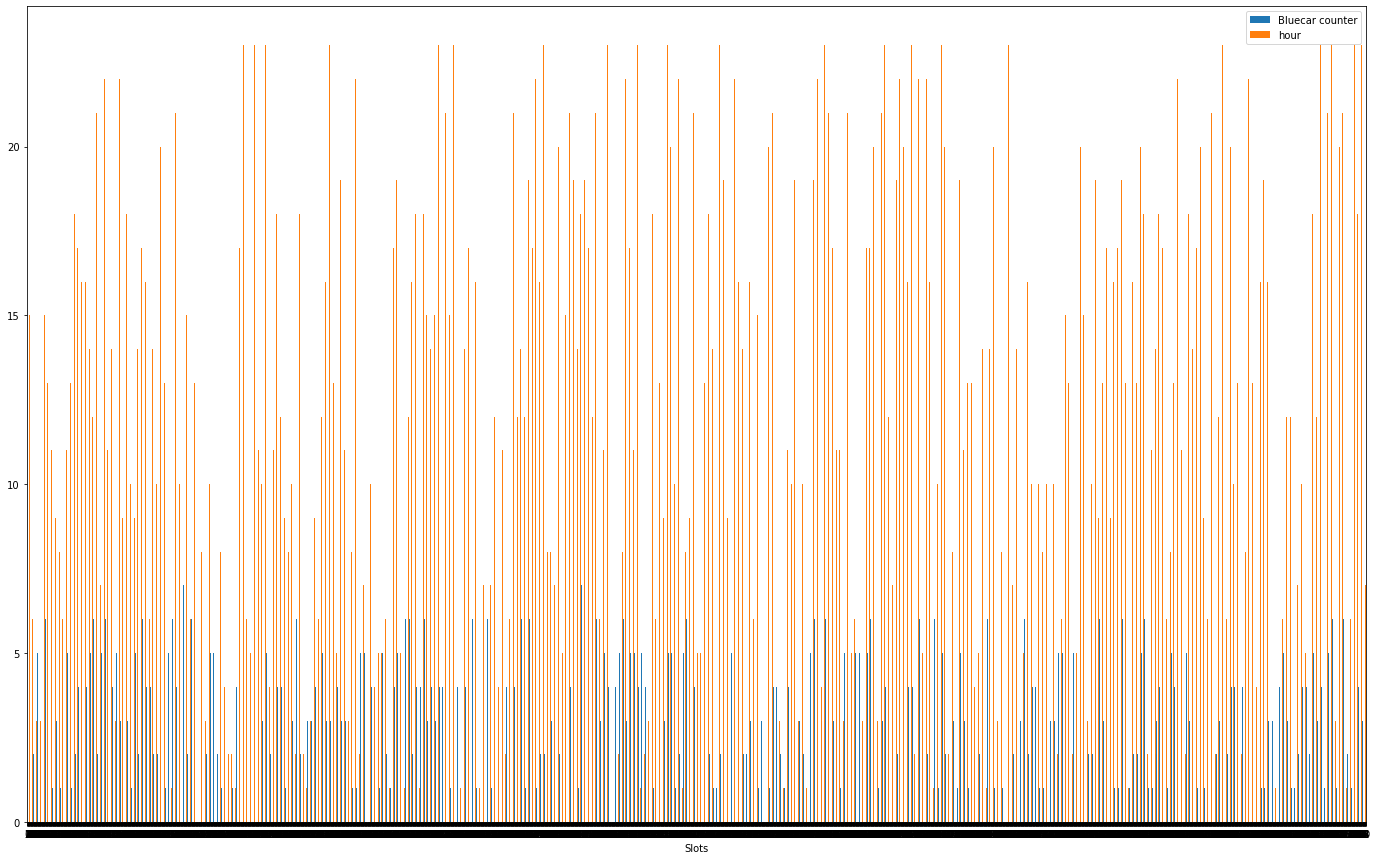

In [ ]:
autolib_new.plot.bar(x='Slots', rot=0, figsize=(24,15), subplots=False)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0, flags=flags)


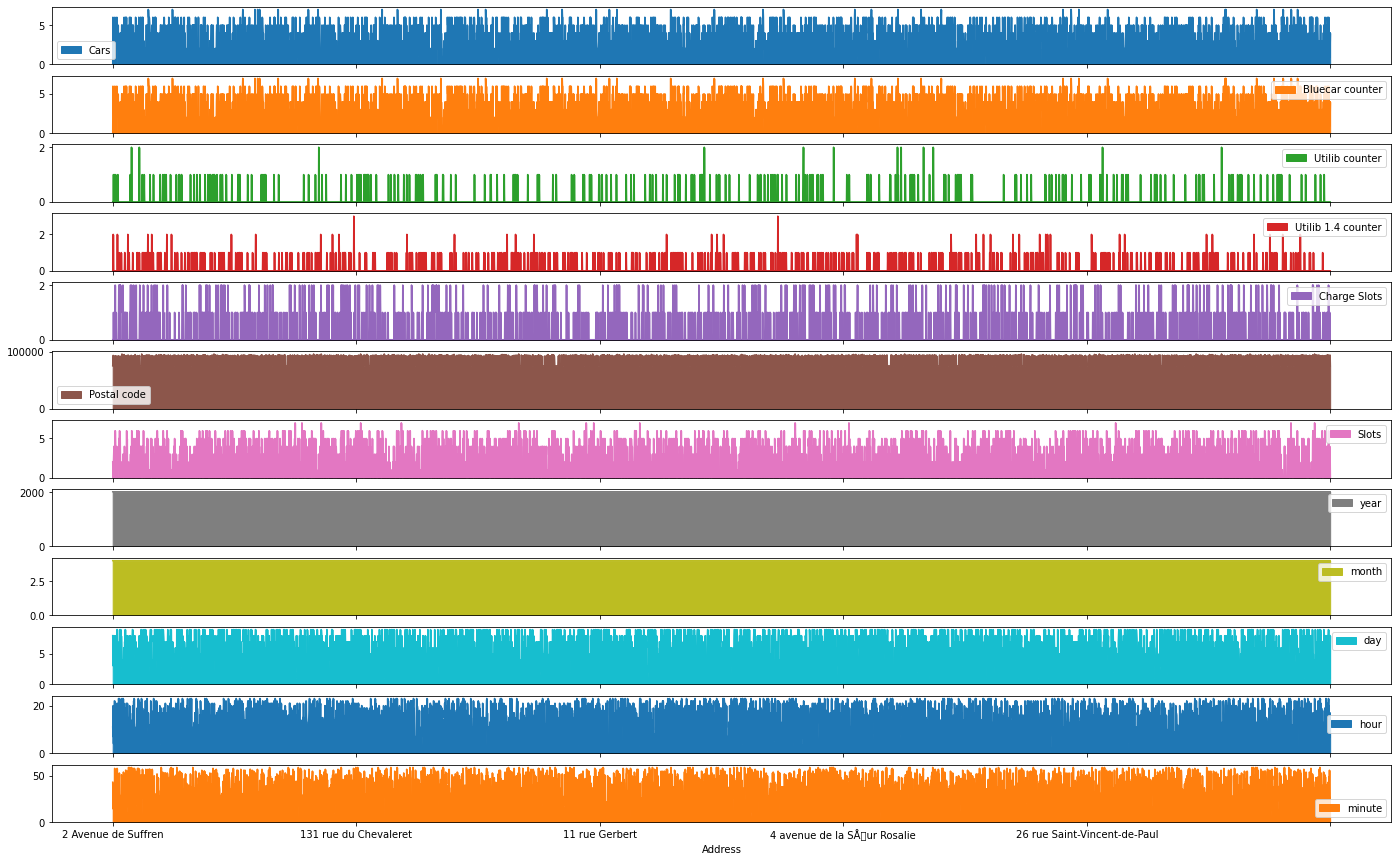

In [ ]:
axs = autolib.plot.area(figsize=(24, 15), subplots=True)